<a href="https://colab.research.google.com/github/marcyhelen/Preparacion/blob/main/Preparacion_de_datos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparación de los datos


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd

# Visualización de datos
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_excel("/content/drive/MyDrive/MAESTRIA/VENTAS 2019 - 2023.xlsx", parse_dates=['FECHA'])
df.head()

,Cod_vende,nom_vende,cod_clien,nom_clien,cod_zona,nom_zona,cod_ciudad,nom_ciudad,cod_ruta,nom_ruta,...,canti_bonidev,desc_dev,Und,Neto_final,FECHA,C1,C2,C3,categoria,clase_terapeutica
0,0,SIN NOMBRE,381,HIPERMAXI S.A.,95,Hipermaxi,1,SANTA CRUZ,67,Ruta Cadenas CBBA,...,0,0.0,-9,-420.75,2019-06-25,420.75,-420.75,0.0,A11A4,A11A4 OTROS PREP.POLIV.MIN.
1,1,VENDEDOR OFICINA SCZ,306,PROSALUD,115,Prosalud,1,SANTA CRUZ,81,Ruta Cadenas SCZ,...,0,0.0,5,233.75,2019-01-18,0.00,233.75,0.0,A11A4,A11A4 OTROS PREP.POLIV.MIN.
2,1,VENDEDOR OFICINA SCZ,2388,Ginesalud fact. Pamiluz Soliz,116,Chiquitania,1,SANTA CRUZ,55,Ruta - 6 SCZ,...,0,0.0,2,93.50,2019-02-14,0.00,93.50,0.0,A11A4,A11A4 OTROS PREP.POLIV.MIN.
3,1,VENDEDOR OFICINA SCZ,360,Farmacia BioFarma,111,2 de agosto / mutualista,1,SANTA CRUZ,53,Ruta - 4 SCZ,...,0,0.0,1,49.50,2019-04-02,0.00,49.50,0.0,A11A4,A11A4 OTROS PREP.POLIV.MIN.
4,1,VENDEDOR OFICINA SCZ,1881,Antonio Roman Casanova,111,2 de agosto / mutualista,1,SANTA CRUZ,53,Ruta - 4 SCZ,...,0,0.0,3,135.30,2019-05-09,0.00,135.30,0.0,A11A4,A11A4 OTROS PREP.POLIV.MIN.


In [4]:
df = df[df['Codigo'] == 13].loc[:, ['FECHA', 'Und']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8508 entries, 6466 to 78242
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FECHA   8508 non-null   datetime64[ns]
 1   Und     8508 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 199.4 KB


In [5]:
df.head()

,FECHA,Und
6466,2019-01-18,-100
6467,2019-01-23,-10
6468,2019-01-14,1
6469,2019-02-28,-36
6470,2019-01-15,36


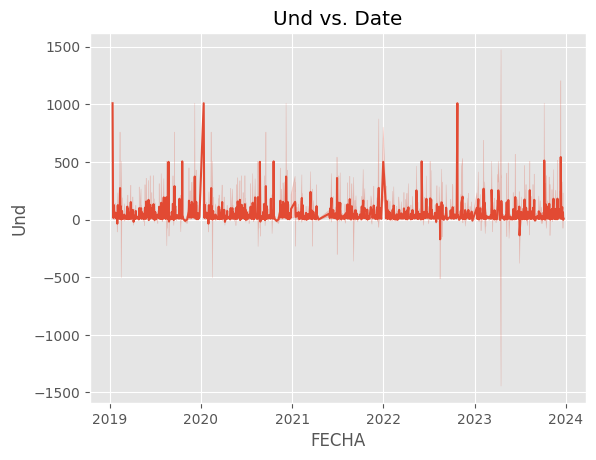

In [6]:
import seaborn as sns
sns.lineplot(data=df, x="FECHA", y="Und")


# Set the title and show the plot
plt.title("Und vs. Date")
plt.show()


In [7]:
import pandas as pd
df1 = df.groupby('FECHA')['Und'].sum().reset_index()
df2 = df1.groupby(pd.Grouper(key='FECHA', freq='M'))['Und'].sum().reset_index()
df3 = df1.groupby(pd.Grouper(key='FECHA', freq='Y'))['Und'].sum().reset_index()

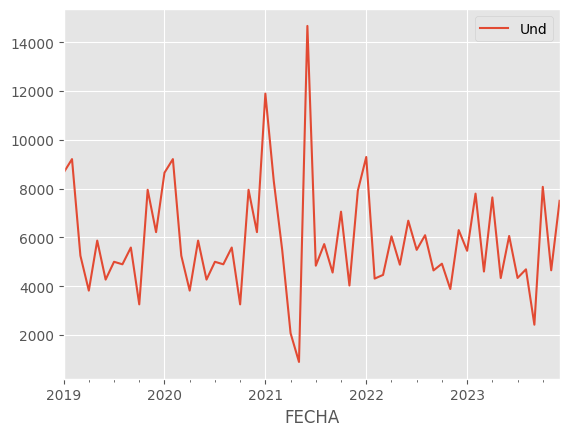

In [8]:
import matplotlib.pyplot as plt
df2.plot(x='FECHA', y='Und')
plt.show()

In [9]:
df2 = df2.set_index('FECHA')
df2.head()

,Und
FECHA,
2019-01-31,8649
2019-02-28,9207
2019-03-31,5250
2019-04-30,3818
2019-05-31,5869


In [10]:
#Asignamos una frecuencia mensual
df2.index.freq= 'M'

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-31 to 2023-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Und     60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [12]:
fig = px.line(df2, x=df2.index, y="Und",template = "plotly_dark",
              title="Unidades vendidas")
fig.show()

No existe una tendencia

count       60.000000
mean      5865.316667
std       2288.145393
min        897.000000
25%       4534.750000
50%       5470.000000
75%       7164.250000
max      14664.000000
Name: Und, dtype: float64

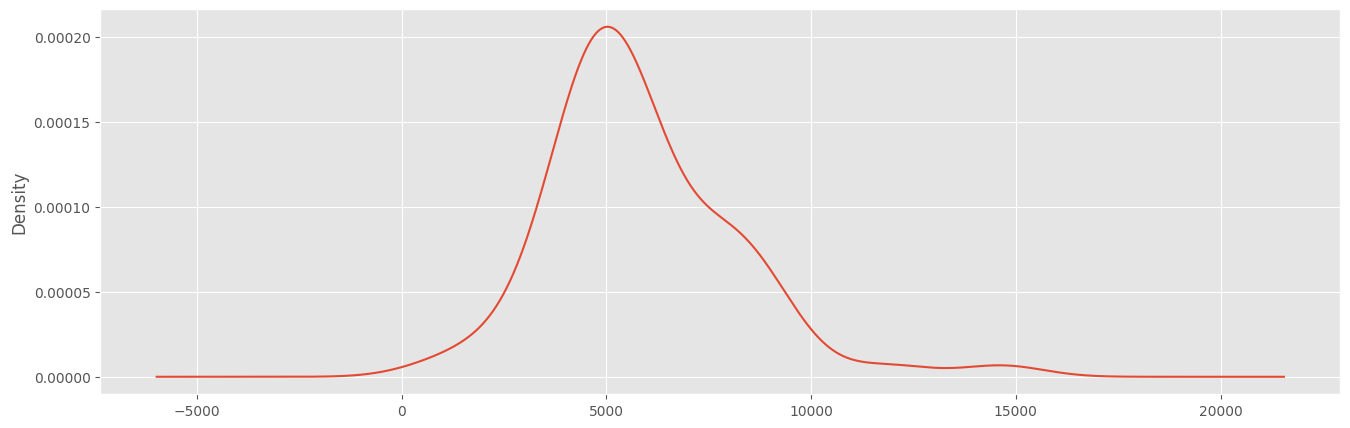

In [13]:
# El gráfico de densidad otra gráfica de exploración
df2['Und'].plot(kind='kde', figsize=(16,5))
df2['Und'].describe()

In [14]:
datos = df2.copy()

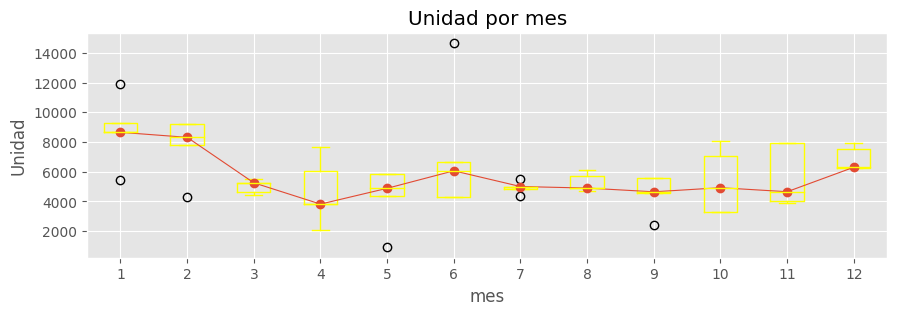

In [15]:
# Gráfico bloxplot para estacionalidad anual

fig, ax= plt.subplots(figsize=(10,3))
datos['mes'] = datos.index.month
datos.boxplot(column='Und', by='mes', ax=ax, color="yellow")
datos.groupby('mes')["Und"].median().plot(style='o-', linewidth=0.8,ax=ax)
ax.set_ylabel('Unidad')
ax.set_title('Unidad por mes')
fig.suptitle('');

### CALCULAR LOS OUTLIERS

In [16]:
Q1 = datos['Und'].quantile(0.25)
print("Primer cuartil", Q1)

Q3 = datos['Und'].quantile(0.75)
print("Tercer cuartil", Q3)

IQR= Q3-Q1

Mediana= datos['Und'].median()
print("Mediana", Mediana)

Valor_minimo = datos['Und'].min()
print("Valor minimo: ", Valor_minimo )

Valor_maximo = datos['Und'].max()
print("Valor maximo: ", Valor_maximo)

Primer cuartil 4534.75
Tercer cuartil 7164.25
Mediana 5470.0
Valor minimo:  897
Valor maximo:  14664


In [17]:
BI_Calculado = (Q1-1.5 *IQR)
print("BI_Calculado", BI_Calculado)

BS_Calculado = (Q3+1.5 *IQR)
print("BS_Calculado", BS_Calculado)

BI_Calculado 590.5
BS_Calculado 11108.5


In [18]:
ubicacion_outliers = (datos['Und'] < BI_Calculado) | (datos['Und'] > BS_Calculado)
print("Ubicacion de los outliers", ubicacion_outliers)

Ubicacion de los outliers FECHA
2019-01-31    False
2019-02-28    False
2019-03-31    False
2019-04-30    False
2019-05-31    False
2019-06-30    False
2019-07-31    False
2019-08-31    False
2019-09-30    False
2019-10-31    False
2019-11-30    False
2019-12-31    False
2020-01-31    False
2020-02-29    False
2020-03-31    False
2020-04-30    False
2020-05-31    False
2020-06-30    False
2020-07-31    False
2020-08-31    False
2020-09-30    False
2020-10-31    False
2020-11-30    False
2020-12-31    False
2021-01-31     True
2021-02-28    False
2021-03-31    False
2021-04-30    False
2021-05-31    False
2021-06-30     True
2021-07-31    False
2021-08-31    False
2021-09-30    False
2021-10-31    False
2021-11-30    False
2021-12-31    False
2022-01-31    False
2022-02-28    False
2022-03-31    False
2022-04-30    False
2022-05-31    False
2022-06-30    False
2022-07-31    False
2022-08-31    False
2022-09-30    False
2022-10-31    False
2022-11-30    False
2022-12-31    False
2023-01-

In [19]:
outliers = datos[ubicacion_outliers]
print("Lista de outliers; ",outliers)

Lista de outliers;                Und  mes
FECHA                 
2021-01-31  11892    1
2021-06-30  14664    6


In [20]:
ubicacion_sin_out = (datos['Und'] >= BI_Calculado) & (datos['Und']<= BS_Calculado )
sin_outliers=datos[ubicacion_sin_out]

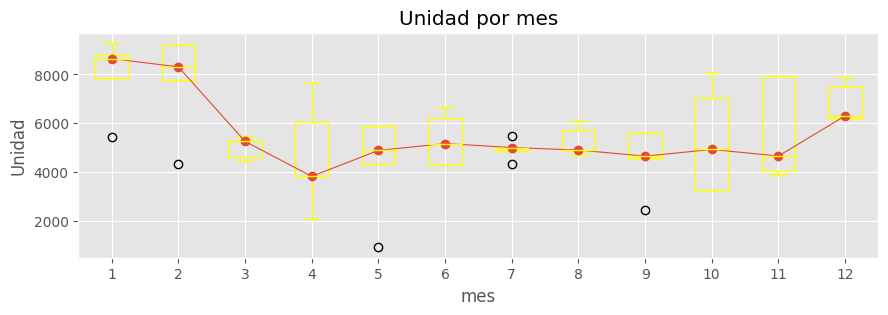

In [21]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize=(10,3))
sin_outliers['mes'] = sin_outliers.index.month
sin_outliers.boxplot(column='Und', by='mes', ax=ax, color="yellow")
sin_outliers.groupby('mes')["Und"].median().plot(style='o-', linewidth=0.8,ax=ax)
ax.set_ylabel('Unidad')
ax.set_title('Unidad por mes')
fig.suptitle('');

## 3.4 La prueba de Dickey-Fuller aumentada
Una prueba de Dickey-Fuller aumentada (ADF) es un tipo de prueba estadística que determina si una raíz unitaria está presente en los datos de series de tiempo. Las raíces unitarias pueden causar resultados impredecibles en el análisis de series de tiempo. Se forma una hipótesis nula en la prueba de raíz unitaria para determinar qué tan fuertemente los datos de series temporales se ven afectados por una tendencia. Al aceptar la hipótesis nula, aceptamos la evidencia de que los datos de la serie temporal no son estacionarios. Al rechazar la hipótesis nula o aceptar la hipótesis alternativa, aceptamos la evidencia de que los datos de la serie de tiempo son generados por un proceso estacionario. Este proceso también se conoce como tendencia estacionaria. Los valores de la estadística de prueba ADF son negativos. Los valores más bajos de ADF indican un rechazo más fuerte de la hipótesis nula.

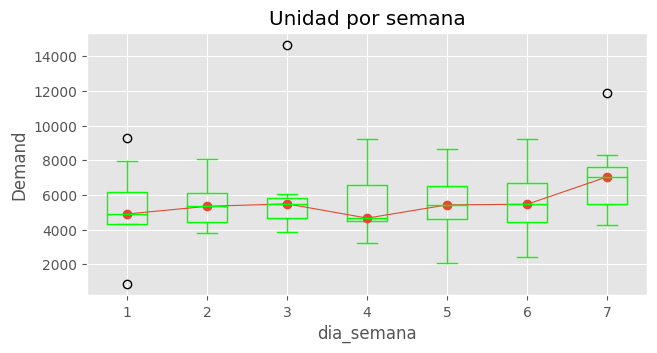

In [22]:
# Gráfico bloxplot para estacionalidad semanal

fig, ax= plt.subplots(figsize=(7,3.5))
datos['dia_semana'] = datos.index.day_of_week + 1
datos.boxplot(column='Und', by='dia_semana', ax=ax, color="lime")
datos.groupby('dia_semana')["Und"].median().plot(style='o-', linewidth=0.8,ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Unidad por semana')
fig.suptitle('');

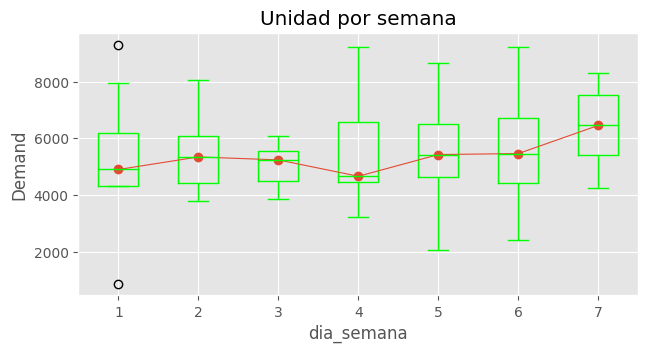

In [23]:
fig, ax= plt.subplots(figsize=(7,3.5))
sin_outliers['dia_semana'] = sin_outliers.index.day_of_week + 1
sin_outliers.boxplot(column='Und', by='dia_semana', ax=ax, color="lime")
sin_outliers.groupby('dia_semana')["Und"].median().plot(style='o-', linewidth=0.8,ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Unidad por semana')
fig.suptitle('');

In [24]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [25]:
Prueba_Dickey_Fuller(sin_outliers["Und"],"Und")

Resultados de la prueba de Dickey-Fuller para columna: Und
Test Statistic                        -4.866088
p-value                                0.000041
No Lags Used                           6.000000
Número de observaciones utilizadas    51.000000
Critical Value (1%)                   -3.565624
Critical Value (5%)                   -2.920142
Critical Value (10%)                  -2.598015
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


<Figure size 700x300 with 0 Axes>

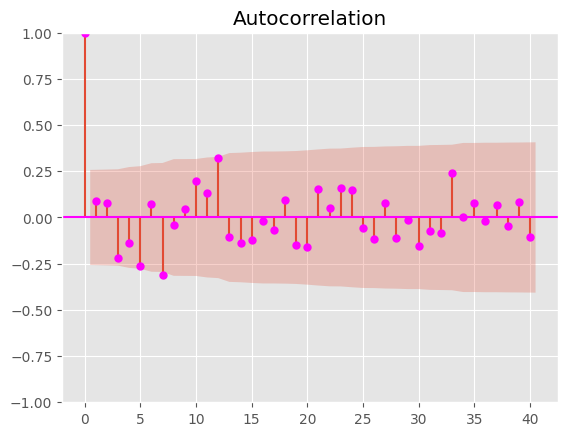

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))
plot_acf(sin_outliers['Und'],lags=40, color='fuchsia')
plt.show()

In [27]:
datos.to_csv('preparacion.csv')

In [28]:
from google.colab import files
files.download('preparacion.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>